# РК ИУ5-61Б Пахомкин Кирсан

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline

In [2]:
data = pd.read_csv('restaurant-scores-lives-standard.csv')

In [3]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.dtypes

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code          object
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
dtype: object

In [5]:
data.isnull().sum()
# проверим есть ли пропущенные значения

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code          1018
business_latitude            19556
business_longitude           19556
business_location            19556
business_phone_number        36938
inspection_id                    0
inspection_date                  0
inspection_score             13610
inspection_type                  0
violation_id                 12870
violation_description        12870
risk_category                12870
Neighborhoods (old)          19594
Police Districts             19594
Supervisor Districts         19594
Fire Prevention Districts    19646
Zip Codes                    19576
Analysis Neighborhoods       19594
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                53973 non-null  int64  
 1   business_name              53973 non-null  object 
 2   business_address           53973 non-null  object 
 3   business_city              53973 non-null  object 
 4   business_state             53973 non-null  object 
 5   business_postal_code       52955 non-null  object 
 6   business_latitude          34417 non-null  float64
 7   business_longitude         34417 non-null  float64
 8   business_location          34417 non-null  object 
 9   business_phone_number      17035 non-null  float64
 10  inspection_id              53973 non-null  object 
 11  inspection_date            53973 non-null  object 
 12  inspection_score           40363 non-null  float64
 13  inspection_type            53973 non-null  obj

### Обработка пропусков

In [7]:
# Удаляем столбцы, которые не несут значимой информации
data.drop(['business_name','business_address'], axis = 1, inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                53973 non-null  int64  
 1   business_city              53973 non-null  object 
 2   business_state             53973 non-null  object 
 3   business_postal_code       52955 non-null  object 
 4   business_latitude          34417 non-null  float64
 5   business_longitude         34417 non-null  float64
 6   business_location          34417 non-null  object 
 7   business_phone_number      17035 non-null  float64
 8   inspection_id              53973 non-null  object 
 9   inspection_date            53973 non-null  object 
 10  inspection_score           40363 non-null  float64
 11  inspection_type            53973 non-null  object 
 12  violation_id               41103 non-null  object 
 13  violation_description      41103 non-null  obj

### Обработка пропусков в числовых данных

In [9]:
# Заполняем отсутствующие значения 
data['business_latitude'] = data['business_latitude'].replace(0,np.nan)
data['business_latitude'] = data['business_latitude'].fillna(data['business_latitude'].mean())

In [10]:
data.head()

,business_id,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,San Francisco,CA,NaN,37.771619,NaN,NaN,1.415043e+10,101192_20190606,2019-06-06T00:00:00.000,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,San Francisco,CA,94118,37.771619,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,San Francisco,CA,94110,37.771619,NaN,NaN,NaN,92982_20170912,2017-09-12T00:00:00.000,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,San Francisco,CA,94111,37.771619,NaN,NaN,1.415488e+10,101389_20190625,2019-06-25T00:00:00.000,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,San Francisco,CA,94109,37.771619,NaN,NaN,NaN,85986_20161011,2016-10-11T00:00:00.000,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.isnull().sum()
# проверим есть ли пропущенные значения в столбце business_latitude

business_id                      0
business_city                    0
business_state                   0
business_postal_code          1018
business_latitude                0
business_longitude           19556
business_location            19556
business_phone_number        36938
inspection_id                    0
inspection_date                  0
inspection_score             13610
inspection_type                  0
violation_id                 12870
violation_description        12870
risk_category                12870
Neighborhoods (old)          19594
Police Districts             19594
Supervisor Districts         19594
Fire Prevention Districts    19646
Zip Codes                    19576
Analysis Neighborhoods       19594
dtype: int64

### Обработка пропусков в категориальных данных

In [12]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 53973


In [13]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка business_postal_code. Тип данных object. Количество пустых значений 1018, 1.89%.
Колонка business_location. Тип данных object. Количество пустых значений 19556, 36.23%.
Колонка violation_id. Тип данных object. Количество пустых значений 12870, 23.85%.
Колонка violation_description. Тип данных object. Количество пустых значений 12870, 23.85%.
Колонка risk_category. Тип данных object. Количество пустых значений 12870, 23.85%.


In [14]:
# Заполняем отсутствующие значения 
data['violation_id'] = data.fillna("Nane")
data.head()

,business_id,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,San Francisco,CA,NaN,37.771619,NaN,NaN,1.415043e+10,101192_20190606,2019-06-06T00:00:00.000,...,New Ownership,101192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,San Francisco,CA,94118,37.771619,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,...,Routine - Unscheduled,97975,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,San Francisco,CA,94110,37.771619,NaN,NaN,NaN,92982_20170912,2017-09-12T00:00:00.000,...,New Ownership,92982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,San Francisco,CA,94111,37.771619,NaN,NaN,1.415488e+10,101389_20190625,2019-06-25T00:00:00.000,...,New Construction,101389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,San Francisco,CA,94109,37.771619,NaN,NaN,NaN,85986_20161011,2016-10-11T00:00:00.000,...,New Ownership,85986,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.isnull().sum()
# проверим есть ли пропущенные значения в столбце violation_id

business_id                      0
business_city                    0
business_state                   0
business_postal_code          1018
business_latitude                0
business_longitude           19556
business_location            19556
business_phone_number        36938
inspection_id                    0
inspection_date                  0
inspection_score             13610
inspection_type                  0
violation_id                     0
violation_description        12870
risk_category                12870
Neighborhoods (old)          19594
Police Districts             19594
Supervisor Districts         19594
Fire Prevention Districts    19646
Zip Codes                    19576
Analysis Neighborhoods       19594
dtype: int64

<Figure size 864x432 with 0 Axes>

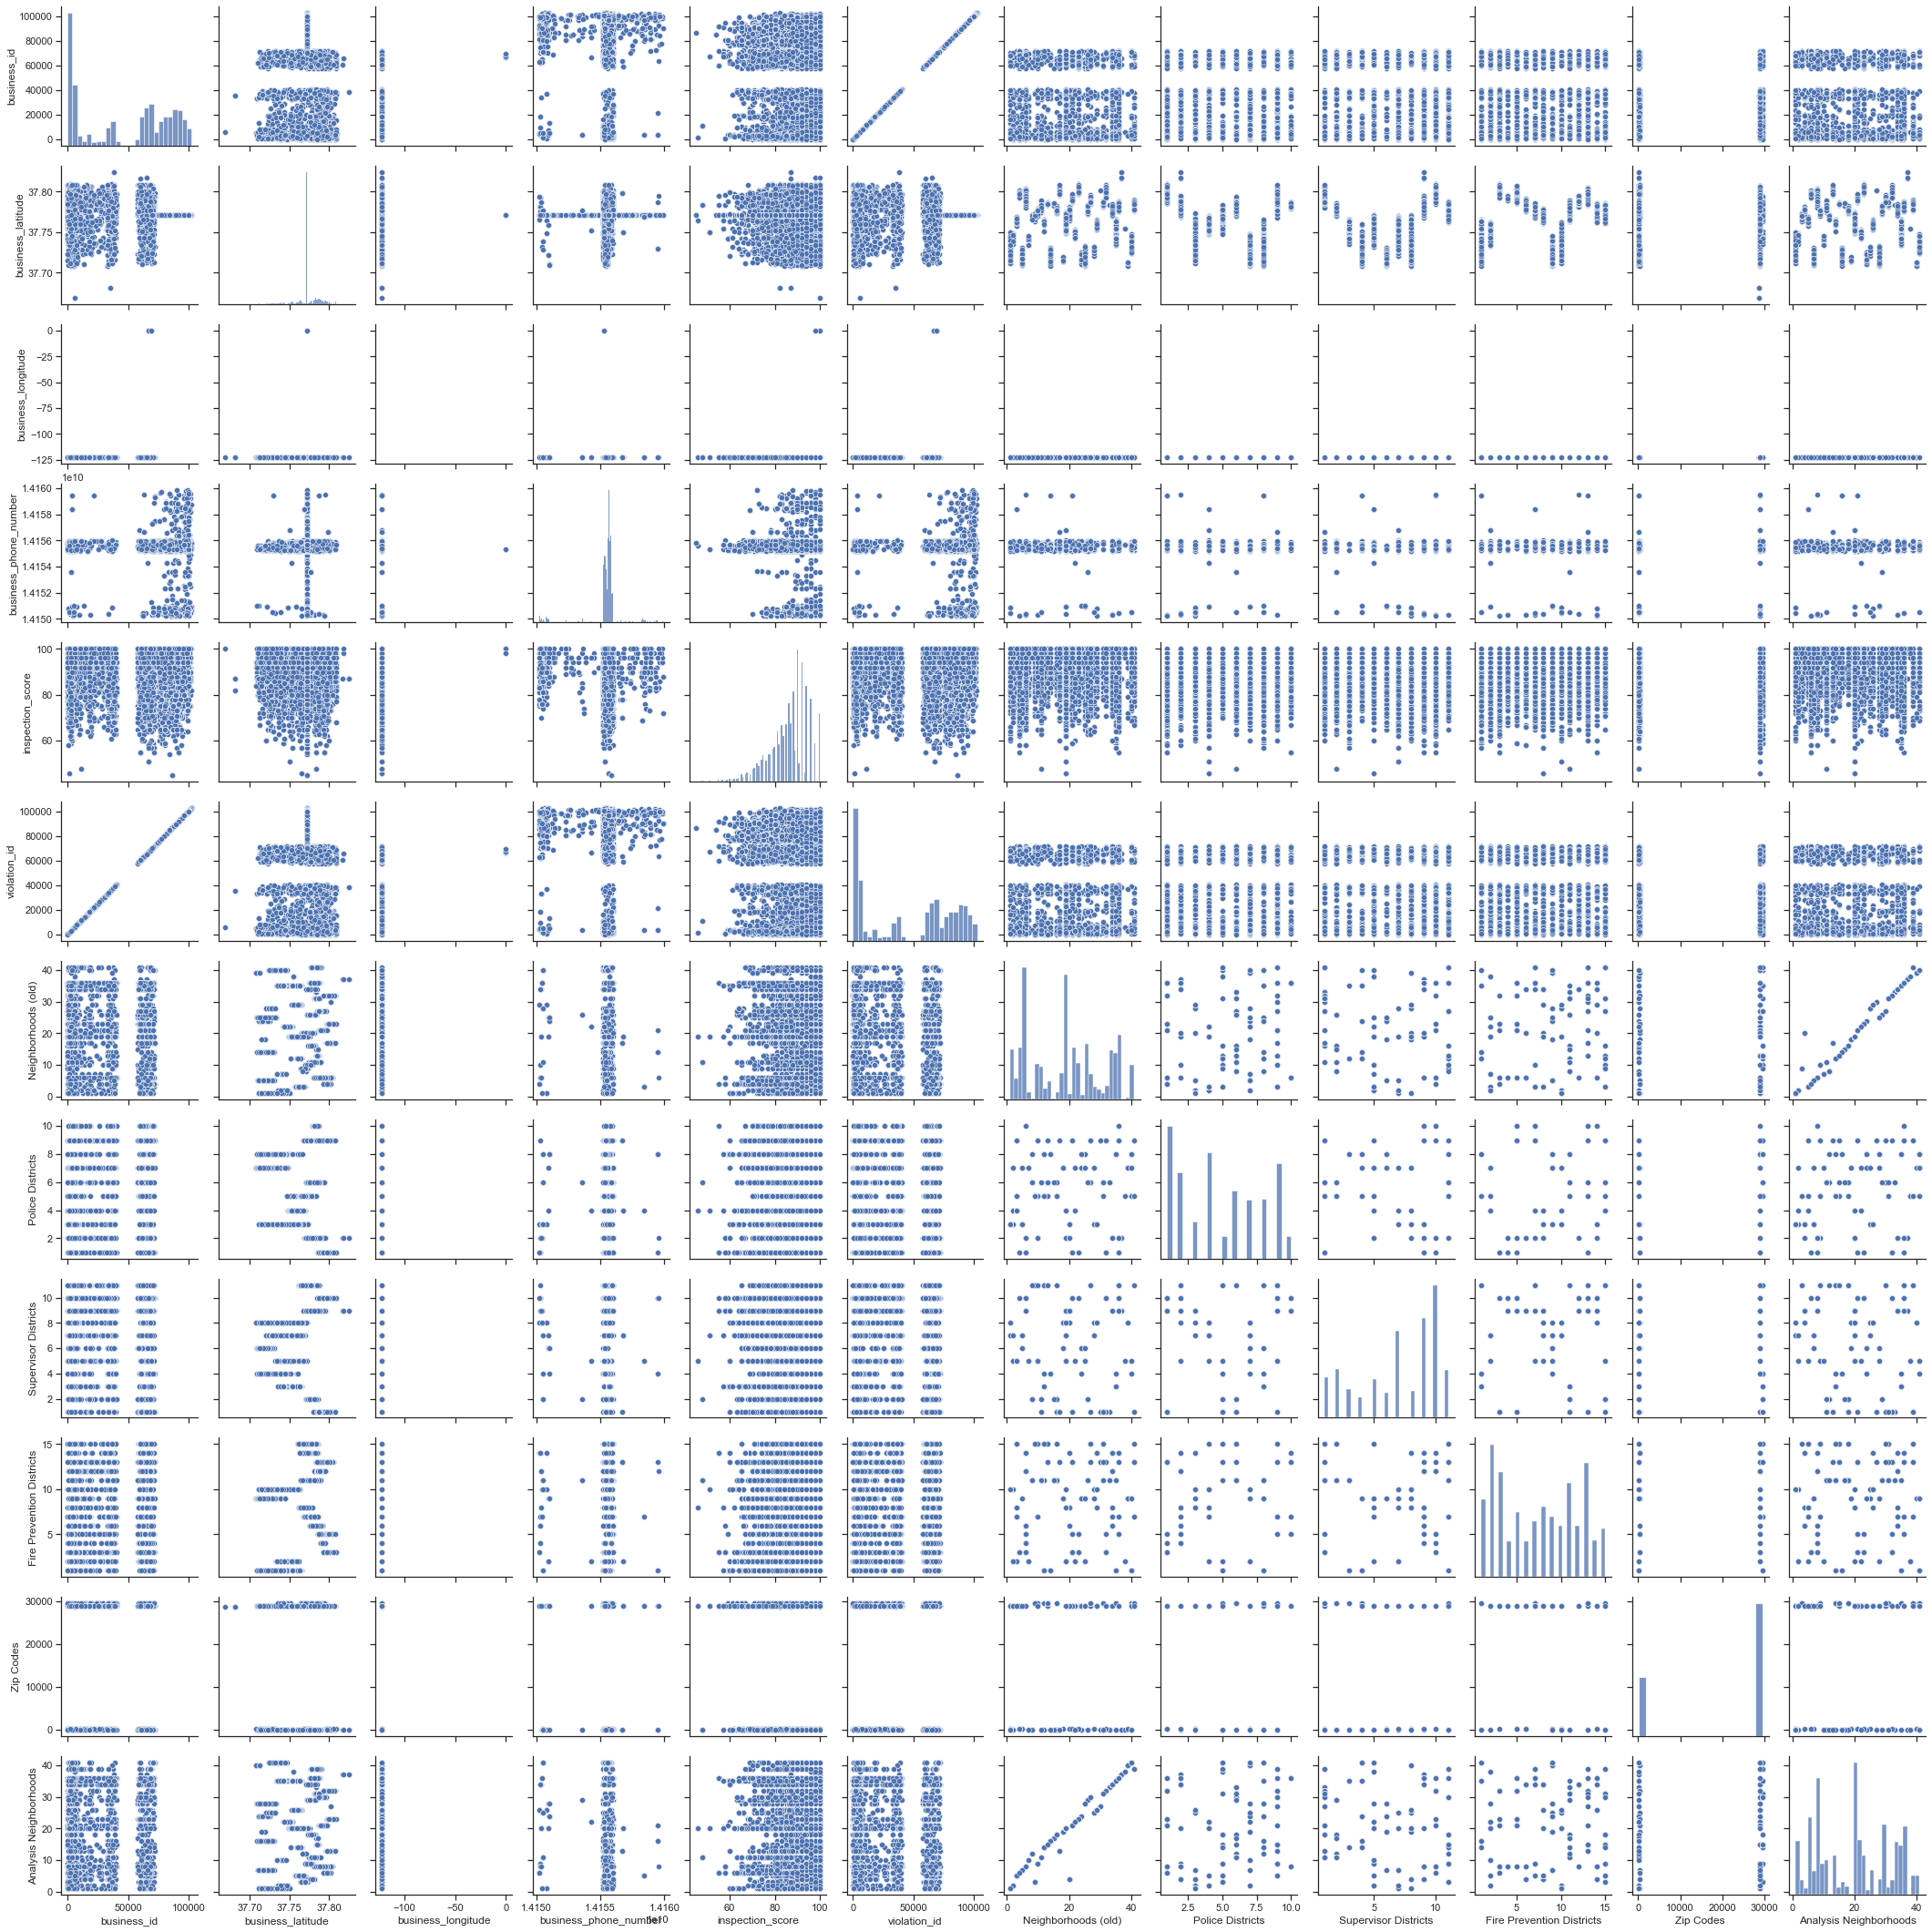

In [16]:
# Диаграммы рассеяние для всех признаков
plt.figure(figsize=(12,6))
sns.pairplot(data)

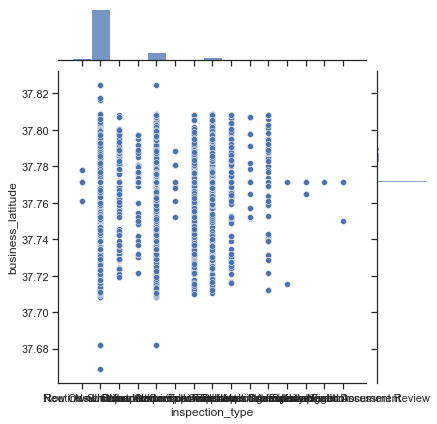

In [17]:
# Увеличенные диаграммы рассеяния 
sns.jointplot(x = "inspection_type", y = "business_latitude", kind="scatter", data = data)

<AxesSubplot:xlabel='inspection_type', ylabel='business_latitude'>

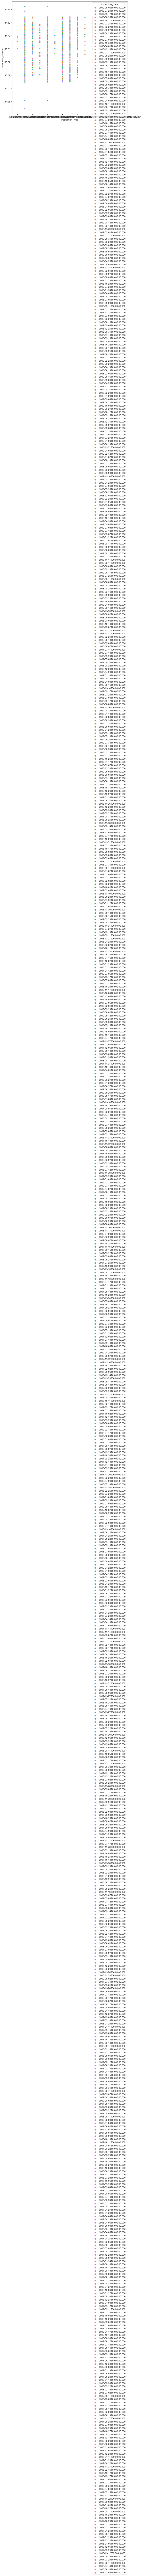

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='inspection_type', y='business_latitude', data=data, hue='inspection_date')